In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
def load_images_from_folder(folder, image_size=(64, 64)):
    images = []
    labels = []
    label_map = {}
    current_label = 0
    for class_folder in os.listdir(folder):
        class_folder_path = os.path.join(folder, class_folder)
        if os.path.isdir(class_folder_path):
            for image_file in os.listdir(class_folder_path):
                image_path = os.path.join(class_folder_path, image_file)
                image = cv2.imread(image_path)
                image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(current_label)
            label_map[current_label] = class_folder
            current_label += 1
    return np.array(images), np.array(labels), label_map

In [3]:
images_path = 'Data/Images'
images, labels, label_map = load_images_from_folder(images_path)

In [4]:
# Normalize and split the data
X_train, X_val, y_train, y_val = train_test_split(images / 255.0, labels, test_size=0.2, random_state=42)

## Step 2: Build CNN Model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
def build_model(num_filters):
    model = Sequential([
        Conv2D(num_filters, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(16, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model

## Step 3: Compile the Model

In [7]:
model = build_model(8)  # Start with 8 filters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model

## Step 4: Train the Model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 27ms/step - loss: 1.4321 - accuracy: 0.2806 - val_loss: 1.3776 - val_accuracy: 0.3312
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3462 - accuracy: 0.2969 - val_loss: 1.2992 - val_accuracy: 0.4286
Epoch 3/20
20/20 [==============================] - 0s 19ms/step - loss: 1.2628 - accuracy: 0.4209 - val_loss: 1.2537 - val_accuracy: 0.4416
Epoch 4/20
20/20 [==============================] - 0s 19ms/step - loss: 1.2152 - accuracy: 0.4339 - val_loss: 1.2281 - val_accuracy: 0.4545
Epoch 5/20
20/20 [==============================] - 0s 20ms/step - loss: 1.1679 - accuracy: 0.4551 - val_loss: 1.2133 - val_accuracy: 0.4675
Epoch 6/20
20/20 [==============================] - 0s 19ms/step - loss: 1.1249 - accuracy: 0.4959 - val_loss: 1.2215 - val_accuracy: 0.4545
Epoch 7/20
20/20 [==============================] - 0s 21ms/step - loss: 1.0826 - accuracy: 0.5057 - val_loss: 1.1896 - val_accuracy: 0.4805
Epoch 8/20
20

## Step 5: Plot Learning Curves

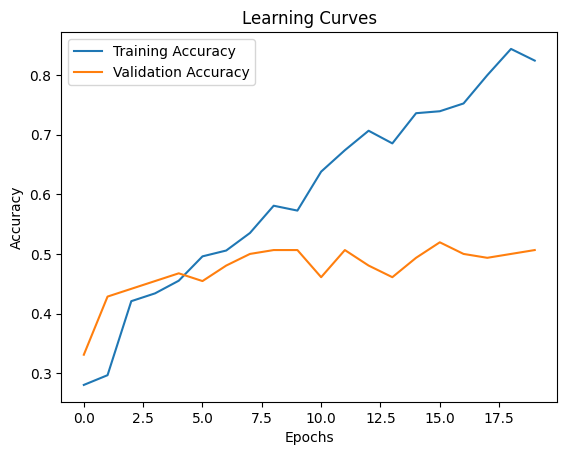

In [10]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Learning Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_learning_curves(history)

**Banner ID: 9164609**

## Step 6: Train the CNN using 2 other number of nodes in the hidden layer (iv): 8 and 32 with all other parameters unchanged

In [11]:
def build_model(num_filters, num_nodes):
    model = Sequential([
        Conv2D(num_filters, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(num_nodes, activation='relu'),
        Dense(4, activation='softmax')
    ])
    return model

In [12]:
# Model with 8 nodes in the hidden layer
model_8_nodes = build_model(8, 8)  # 8 filters in the conv layer, 8 nodes in the hidden layer
model_8_nodes.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Model with 32 nodes in the hidden layer
model_32_nodes = build_model(8, 32)  # 8 filters in the conv layer, 32 nodes in the hidden layer
model_32_nodes.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Step 7: Train the Models

In [14]:
history_8_nodes = model_8_nodes.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 26ms/step - loss: 1.4000 - accuracy: 0.2969 - val_loss: 1.3672 - val_accuracy: 0.3896
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3607 - accuracy: 0.3622 - val_loss: 1.3290 - val_accuracy: 0.4545
Epoch 3/20
20/20 [==============================] - 0s 19ms/step - loss: 1.2933 - accuracy: 0.4486 - val_loss: 1.3650 - val_accuracy: 0.3442
Epoch 4/20
20/20 [==============================] - 0s 19ms/step - loss: 1.2984 - accuracy: 0.4290 - val_loss: 1.3112 - val_accuracy: 0.4545
Epoch 5/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2794 - accuracy: 0.4470 - val_loss: 1.3508 - val_accuracy: 0.3831
Epoch 6/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2565 - accuracy: 0.4715 - val_loss: 1.2988 - val_accuracy: 0.4416
Epoch 7/20
20/20 [==============================] - 0s 20ms/step - loss: 1.2244 - accuracy: 0.4796 - val_loss: 1.3095 - val_accuracy: 0.4481
Epoch 8/20
20

In [15]:
history_32_nodes = model_32_nodes.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
20/20 [==============================] - 1s 27ms/step - loss: 1.3889 - accuracy: 0.3051 - val_loss: 1.3168 - val_accuracy: 0.3571
Epoch 2/20
20/20 [==============================] - 0s 20ms/step - loss: 1.3028 - accuracy: 0.3556 - val_loss: 1.3159 - val_accuracy: 0.2987
Epoch 3/20
20/20 [==============================] - 0s 22ms/step - loss: 1.2396 - accuracy: 0.4095 - val_loss: 1.2610 - val_accuracy: 0.3312
Epoch 4/20
20/20 [==============================] - 0s 20ms/step - loss: 1.1972 - accuracy: 0.4225 - val_loss: 1.2423 - val_accuracy: 0.3831
Epoch 5/20
20/20 [==============================] - 0s 21ms/step - loss: 1.1410 - accuracy: 0.4780 - val_loss: 1.2229 - val_accuracy: 0.4545
Epoch 6/20
20/20 [==============================] - 0s 22ms/step - loss: 1.0683 - accuracy: 0.5367 - val_loss: 1.2083 - val_accuracy: 0.4675
Epoch 7/20
20/20 [==============================] - 0s 20ms/step - loss: 1.0028 - accuracy: 0.5808 - val_loss: 1.2371 - val_accuracy: 0.4610
Epoch 8/20
20

## Step 8: Plot Learning Curves

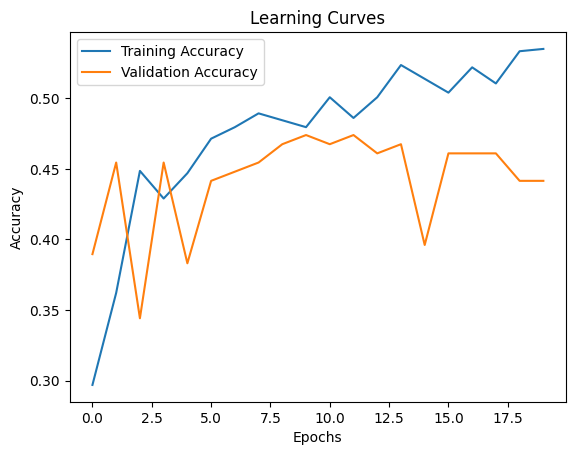

In [16]:
# Plotting the learning curves
plot_learning_curves(history_8_nodes)

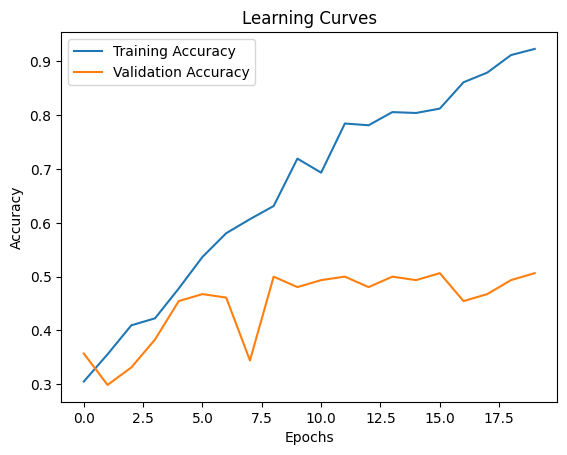

In [17]:
# Plotting the learning curves
plot_learning_curves(history_32_nodes)

In the learning curves, all three models exhibit overfitting, indicated by higher training accuracy compared to validation accuracy. Here's a brief analysis:

1. **First Model (16 Nodes):** Shows significant overfitting with a large gap between training and validation accuracy.

2. **Model with 8 Nodes:** Less overfitting than the first model but still present, with a slightly lower overall accuracy.

3. **Model with 32 Nodes:** Similar to the first model, it shows overfitting with a gap between training and validation accuracy. The higher capacity (more nodes) might be contributing to more overfitting.

To combat overfitting, consider techniques like data augmentation, regularization, dropout, and early stopping. These strategies can help improve the model's ability to generalize to unseen data.